문제 1:
  학생 - 응답 시간: 3.70초, 정답 여부: 정답
  AI - 응답 시간: 4.09초, 정답률: 0.50, 정답 여부: 정답

문제 2:
  학생 - 응답 시간: 3.15초, 정답 여부: 정답
  AI - 응답 시간: 3.44초, 정답률: 0.98, 정답 여부: 정답

문제 3:
  학생 - 응답 시간: 2.16초, 정답 여부: 정답
  AI - 응답 시간: 2.27초, 정답률: 0.98, 정답 여부: 정답

문제 4:
  학생 - 응답 시간: 3.68초, 정답 여부: 정답
  AI - 응답 시간: 4.07초, 정답률: 0.98, 정답 여부: 정답

문제 5:
  학생 - 응답 시간: 3.24초, 정답 여부: 정답
  AI - 응답 시간: 3.56초, 정답률: 0.98, 정답 여부: 정답

문제 6:
  학생 - 응답 시간: 3.09초, 정답 여부: 정답
  AI - 응답 시간: 3.36초, 정답률: 0.98, 정답 여부: 정답

문제 7:
  학생 - 응답 시간: 2.84초, 정답 여부: 정답
  AI - 응답 시간: 3.04초, 정답률: 0.98, 정답 여부: 정답

문제 8:
  학생 - 응답 시간: 2.98초, 정답 여부: 정답
  AI - 응답 시간: 3.22초, 정답률: 0.98, 정답 여부: 정답

문제 9:
  학생 - 응답 시간: 2.48초, 정답 여부: 정답
  AI - 응답 시간: 2.60초, 정답률: 0.98, 정답 여부: 정답

문제 10:
  학생 - 응답 시간: 2.99초, 정답 여부: 정답
  AI - 응답 시간: 3.24초, 정답률: 0.98, 정답 여부: 정답

문제 11:
  학생 - 응답 시간: 2.92초, 정답 여부: 정답
  AI - 응답 시간: 3.15초, 정답률: 0.98, 정답 여부: 정답

문제 12:
  학생 - 응답 시간: 2.08초, 정답 여부: 정답
  AI - 응답 시간: 2.20초, 정답률: 0.98, 정답 여부: 정답

문제 13:
  학생 - 응답 시간: 2.14초, 정답 여부: 정답

C:\Users\user\AppData\Local\Temp\ipykernel_4304\362575922.py:78: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_4304\362575922.py:78: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_4304\362575922.py:78: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_4304\362575922.py:78: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_4304\362575922.py:78: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_4304\362575922.py:78: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu 

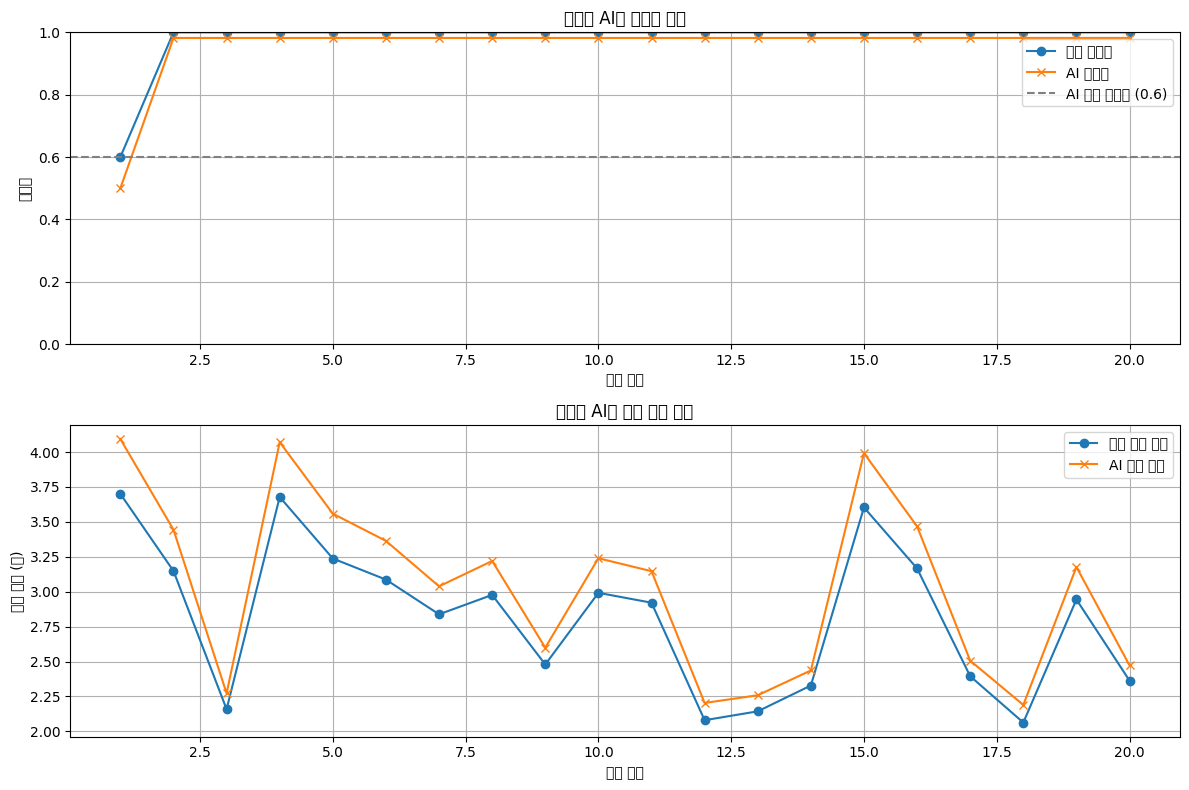

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid 함수 정의
def sigmoid(x, k=10, threshold=0.6):
    return 1 / (1 + np.exp(-k * (x - threshold)))

# AI 정답률 계산
def calculate_ai_accuracy(student_accuracy, T=0.6, k=10):
    return sigmoid(student_accuracy, k, T)

# AI 응답 속도 계산
def calculate_ai_response_time(student_time, T_min=1.5, T_max=5.0, T_threshold=3.0, k_t=1.5):
    return T_min + (T_max - T_min) * sigmoid(student_time, k_t, T_threshold)

# 시뮬레이션 설정
num_questions = 20
student_accuracy = 0.6  # 초기 정답률
T_threshold = 3.0  # 학생 응답 속도의 기준값
T_min, T_max = 1.5, 5.0  # AI 최소/최대 응답 시간

# 데이터 저장용 리스트
student_accuracies = [student_accuracy]
ai_accuracies = []
student_response_times = []
ai_response_times = []

# 시뮬레이션 실행
for i in range(1, num_questions + 1):
    # 학생 응답 시간과 정답률 업데이트
    student_time = np.random.uniform(2.0, 4.0)  # 학생 응답 시간 (랜덤 값)
    student_correct = np.random.rand() < student_accuracy  # 학생 정답 여부

    # AI 응답 계산
    ai_accuracy = calculate_ai_accuracy(student_accuracy)
    ai_correct = np.random.rand() < ai_accuracy  # AI 정답 여부
    ai_response_time = calculate_ai_response_time(student_time, T_min, T_max, T_threshold)

    # 데이터 저장
    ai_accuracies.append(ai_accuracy)
    student_response_times.append(student_time)
    ai_response_times.append(ai_response_time)

    # 출력
    print(f"문제 {i}:")
    print(f"  학생 - 응답 시간: {student_time:.2f}초, 정답 여부: {'정답' if student_correct else '오답'}")
    print(f"  AI - 응답 시간: {ai_response_time:.2f}초, 정답률: {ai_accuracy:.2f}, 정답 여부: {'정답' if ai_correct else '오답'}\n")

    # 학생 정답률 업데이트
    student_accuracy = (student_accuracy * (i - 1) + student_correct) / i
    student_accuracies.append(student_accuracy)

# 시각화
plt.figure(figsize=(12, 8))

# 학생과 AI의 정답률 변화
plt.subplot(2, 1, 1)
plt.plot(range(1, num_questions + 1), student_accuracies[:-1], label="학생 정답률", marker="o")
plt.plot(range(1, num_questions + 1), ai_accuracies, label="AI 정답률", marker="x")
plt.axhline(0.6, color="gray", linestyle="--", label="AI 초기 중심값 (0.6)")
plt.title("학생과 AI의 정답률 변화")
plt.xlabel("문제 번호")
plt.ylabel("정답률")
plt.ylim(0, 1)
plt.legend()
plt.grid()

# 학생과 AI의 응답 시간 변화
plt.subplot(2, 1, 2)
plt.plot(range(1, num_questions + 1), student_response_times, label="학생 응답 시간", marker="o")
plt.plot(range(1, num_questions + 1), ai_response_times, label="AI 응답 시간", marker="x")
plt.title("학생과 AI의 응답 시간 변화")
plt.xlabel("문제 번호")
plt.ylabel("응답 시간 (초)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
